In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scanpy as sc
import matplotlib as mpl

In [3]:
paul_dpt_pseudotime = pd.read_csv('../1_Paul/paul.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
paul_palantir_time = pd.read_csv("../1_Paul/paul.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
paul_monocle_time = pd.read_csv("../1_Paul/paul.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
paul_dtne_time = pd.read_csv("../1_Paul/paul.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [4]:
paul_Y_umap = pd.read_csv('../1_Paul/paul.Y_umap.csv',index_col=0)

In [5]:
pan_dpt_pseudotime = pd.read_csv('../1_pancreas/pan.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
pan_palantir_time = pd.read_csv("../1_pancreas/pan.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
pan_monocle_time = pd.read_csv("../1_pancreas/pan.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
pan_dtne_time = pd.read_csv("../1_pancreas/pan.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [6]:
pan_Y_umap = pd.read_csv('../1_pancreas/panc.Y_umap.csv',index_col=0)

In [7]:
nest_dpt_pseudotime = pd.read_csv('../1_nestorowa/nest.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
nest_palantir_time = pd.read_csv("../1_nestorowa/nest.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
nest_monocle_time = pd.read_csv("../1_nestorowa/nest.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
nest_dtne_time = pd.read_csv("../1_nestorowa/nest.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [8]:
nest_Y_umap = pd.read_csv('../1_nestorowa/nest.Y_umap.csv',index_col=0)

In [9]:
eb_dpt_pseudotime = pd.read_csv("../1_EB/eb.dpt_pseudotime.csv",index_col=0).values.reshape(-1)
eb_palantir_time = pd.read_csv("../1_EB/eb.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
eb_monocle_time = pd.read_csv("../1_EB/eb.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
eb_dtne_time = pd.read_csv("../1_EB/eb.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [10]:
eb_Y_phate = pd.read_csv('../1_EB/eb.Y_phate.csv',index_col=0)

In [11]:
ra_consensus_time = pd.read_csv("../1_COPILOT/rc.integrated.consensus.time.csv",index_col=0).values.reshape(-1)
ra_dpt_pseudotime = pd.read_csv('../1_COPILOT/rc.integrated.dpt_pseudotime.csv',index_col=0).values.reshape(-1)
ra_palantir_time = pd.read_csv("../1_COPILOT/rc.integrated.palantir_pseudotime.csv",index_col=0).values.reshape(-1)
ra_monocle_time = pd.read_csv("../1_COPILOT/rc.integrated.monocle_pseudotime.csv",index_col=0).values.reshape(-1)
ra_dtne_time = pd.read_csv("../1_COPILOT/rc.integrated.dtne_pseudotime.csv",index_col=0).values.reshape(-1)

In [12]:
ra_Y_umap = pd.read_csv("../1_COPILOT/rc.integrated.Y_umap.csv",index_col=0)

In [13]:
names = ['DPT','Palantir','Monocle3','DTNE']
pseudotimes = [[paul_dpt_pseudotime,paul_palantir_time,paul_monocle_time,paul_dtne_time],
             [nest_dpt_pseudotime,nest_palantir_time,nest_monocle_time,nest_dtne_time],
             [pan_dpt_pseudotime,pan_palantir_time,pan_monocle_time,pan_dtne_time],
             [eb_dpt_pseudotime,eb_palantir_time,eb_monocle_time,eb_dtne_time],
             [ra_dpt_pseudotime,ra_palantir_time,ra_monocle_time,ra_dtne_time],
            ]
Y_dr = [paul_Y_umap,nest_Y_umap,pan_Y_umap,eb_Y_phate,ra_Y_umap]

In [14]:
cmap = 'Spectral'

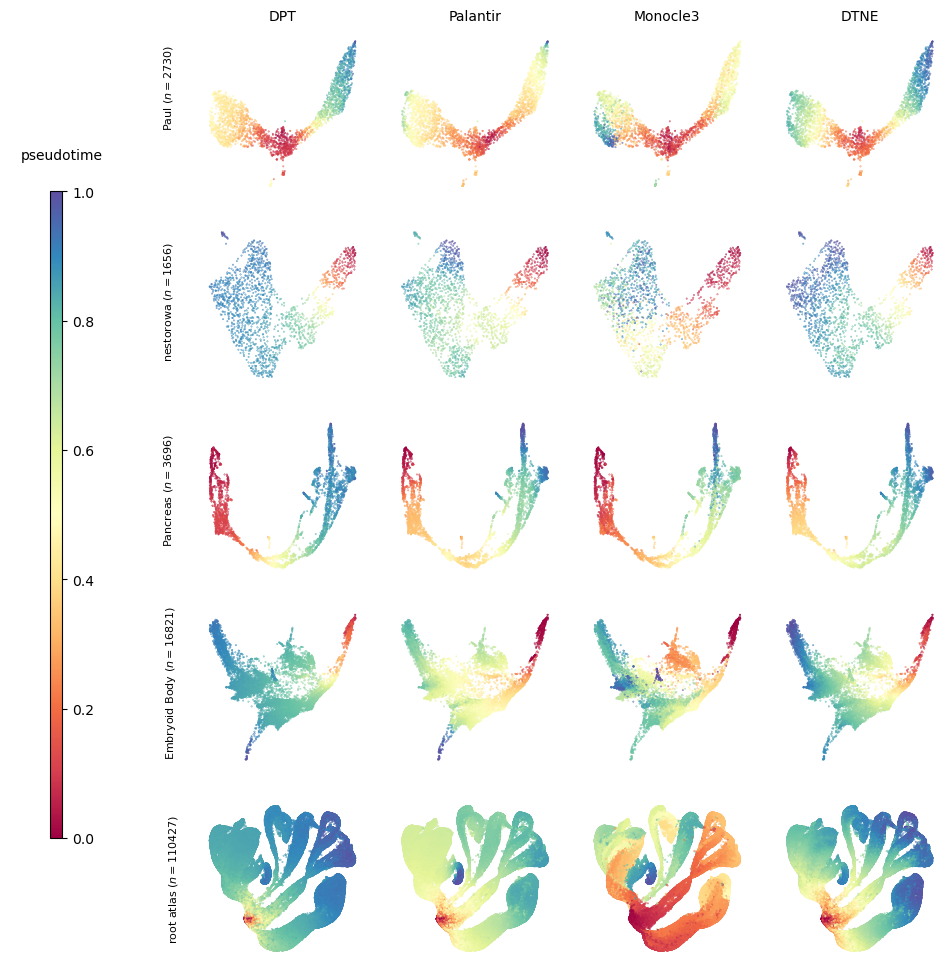

In [16]:
grids = plt.GridSpec(5, 5)
fig = plt.figure(figsize=(12, 12))

ax0 = fig.add_subplot(grids[0:, 0])

for i in range(5):
    Yd= Y_dr[i]
    Y_pseudotime = pseudotimes[i]
    for j in range(1,5):
        gd = grids[i, j]
        ax = fig.add_subplot(gd)
        if i == 0:
            ax.set_title(names[j-1],size=10,pad=10)
        pseudotime = Y_pseudotime[j-1]
        im = ax.scatter(x=Yd['0'], y=Yd['1'],c=pseudotime, s=0.1,cmap= cmap)    
        im.set_rasterized(True)
        ax.axis("off")
        
    if i == 0:
        ax0.text(0.95, 0.9, 'Paul ($n=2730$)',rotation='vertical',fontsize=8)
    if i == 1:
        ax0.text(0.95, 0.65, 'nestorowa ($n=1656$)',rotation='vertical',fontsize=8)
    if i == 2:
        ax0.text(0.95, 0.45, 'Pancreas ($n=3696$)',rotation='vertical',fontsize=8)
    if i == 3:
        ax0.text(0.96, 0.22, 'Embryoid Body ($n=16821$)',rotation='vertical',fontsize=8)
    if i == 4:
        ax0.text(0.98, 0.02, 'root atlas ($n=110427$)',rotation='vertical',fontsize=8)

cax=fig.add_axes([ax0.get_position().x1-0.1, ax0.get_position().y0 +0.1, 0.01, ax0.get_position().height*0.7])
cb = fig.colorbar(im,cax=cax, shrink=0.5,pad=0.3, location = 'right') # title= "pseudotimes", fontsize = 5,title_fontsize=15
ax = cb.ax
ax.text(-2.5,1.05,'pseudotime',rotation=0)
ax0.axis("off") 

plt.savefig('./sc_pseudotime.png', format='png', dpi=1000)
plt.savefig('./sc_pseudotime.pdf', format='pdf', dpi=1000)